## Decompositions

1. PLU: Linear Solve (used by \)
2. QR: Least squares, usefule for linear solve (more reliable, but slower than PLU)
3. Cholesky: Only works for positive definite, useful for linear solve (faster)
4. SVD: low rank approximation, nullspace, defined 2-norm, we did not show how to compute (too advanced)

In [7]:
using LinearAlgebra

# PLU, linear solve
n = 5
A = randn(n,n)
L,U,p = lu(A)



LU{Float64, Matrix{Float64}}
L factor:
5×5 Matrix{Float64}:
  1.0         0.0       0.0        0.0       0.0
 -0.710528    1.0       0.0        0.0       0.0
 -0.0465802  -0.615084  1.0        0.0       0.0
 -0.108844   -0.567712  0.282371   1.0       0.0
  0.412606    0.317933  0.765092  -0.030757  1.0
U factor:
5×5 Matrix{Float64}:
 2.32298  0.236053  -1.27562  -0.85059    0.282366
 0.0      3.15026   -1.48785   1.39529    0.462733
 0.0      0.0       -1.08696   2.16069    0.865832
 0.0      0.0        0.0      -0.507076  -0.49384
 0.0      0.0        0.0       0.0       -0.858366

In [15]:

# Solve A*x = b, i.e., x = A\b, using lu
b = rand(n)
U\(L\b[p]) == A\b

P = I(n)[p,:]
U\(L\(P*b)) == A\b

true

In [16]:
A ≈ P'*L*U

true

In [23]:
# QR linear solve

Q, R = qr(A)
norm(R\(Q'*b) - A\b)

3.3422138886441676e-16

In [26]:
cholesky(A) # fails because not symmetric

LoadError: PosDefException: matrix is not Hermitian; Cholesky factorization failed.

In [28]:
S = Symmetric(A)
cholesky(S) # fails because not positive definite

LoadError: PosDefException: matrix is not positive definite; Cholesky factorization failed.

In [30]:
eigvals(S) # negative eigenvalues means not positive definite, but computing eigenvalues is _expansive_

5-element Vector{Float64}:
 -2.755386221006669
 -1.4496784592955416
  0.6251637425474665
  2.2513537236585375
  3.823625240753941

In [35]:
L = cholesky(S + 10I).L

L'\(L\b) ≈ (S+10I)\b

true

## SVD for images (images non-examinable)

In [3]:
using Images, TestImages

┌ Warning: "camerman" not found in `TestImages.remotefiles`. Load "cameraman.tif" instead.
└ @ TestImages /Users/sheehanolver/.julia/packages/TestImages/OjQVx/src/TestImages.jl:134


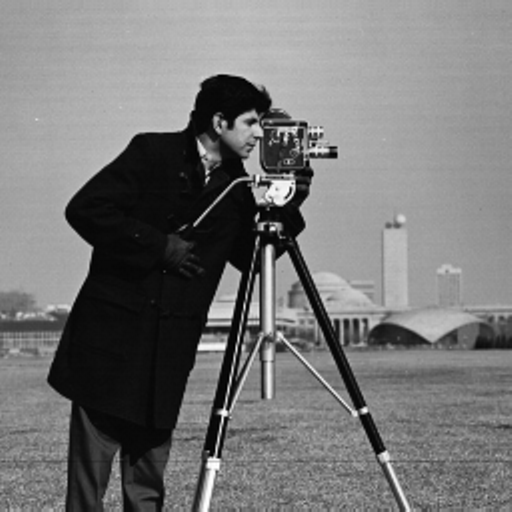

In [4]:
img = testimage("camerman")

In [5]:
Float64.(img) # numbers between 0 and 1, 0 being black, 1 being white

512×512 Matrix{Float64}:
 0.611765  0.615686  0.627451  0.623529  …  0.596078  0.596078  0.596078
 0.611765  0.615686  0.623529  0.619608     0.596078  0.596078  0.596078
 0.619608  0.615686  0.611765  0.611765     0.596078  0.596078  0.596078
 0.627451  0.615686  0.603922  0.603922     0.6       0.596078  0.596078
 0.619608  0.615686  0.611765  0.611765     0.6       0.596078  0.596078
 0.611765  0.615686  0.623529  0.623529  …  0.6       0.6       0.6
 0.619608  0.615686  0.611765  0.611765     0.6       0.6       0.6
 0.627451  0.615686  0.603922  0.603922     0.6       0.6       0.6
 0.619608  0.607843  0.6       0.6          0.596078  0.596078  0.596078
 0.611765  0.603922  0.6       0.6          0.592157  0.596078  0.596078
 0.607843  0.603922  0.603922  0.6       …  0.588235  0.596078  0.596078
 0.607843  0.607843  0.607843  0.603922     0.592157  0.596078  0.596078
 0.607843  0.603922  0.6       0.6          0.592157  0.588235  0.588235
 ⋮                                       

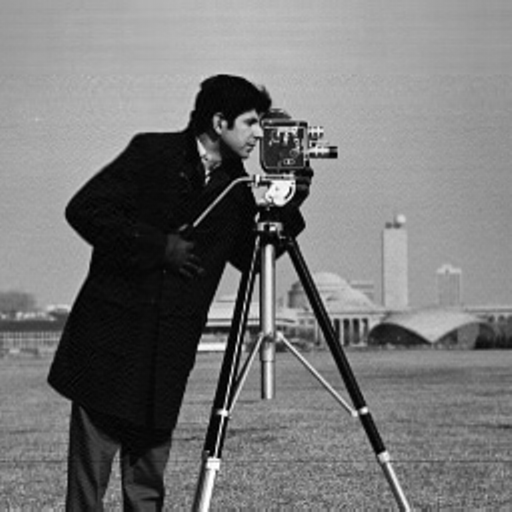

In [37]:
U,σ,V = svd(Float64.(img))

r = 100
Gray.(U[:,1:r] * Diagonal(σ[1:r]) * V[:,1:r]') 

In [56]:
# 512 x 512 pixels, original storage:
512^2

262144

In [57]:
# low rank is 2 * 512 * r storage
2*512*r

51200

In [11]:
using Plots

In [21]:
U[:,3]

512-element Vector{Float64}:
 0.018881909217071204
 0.018866378849115684
 0.01848081138755303
 0.018251235267491284
 0.018576493459996013
 0.018939194957729985
 0.01839979582345298
 0.018213127858712992
 0.01954799202186585
 0.020853348167658093
 0.02057049657216921
 0.02016286846602166
 0.020747466491495503
 ⋮
 0.042765905830890225
 0.042513803767356875
 0.042078973075848985
 0.0421733916152816
 0.04442841904073896
 0.046186277540927856
 0.0442641612091816
 0.04107420756151893
 0.037777696497588914
 0.03517049984248076
 0.03487254658645498
 0.03524527516536348

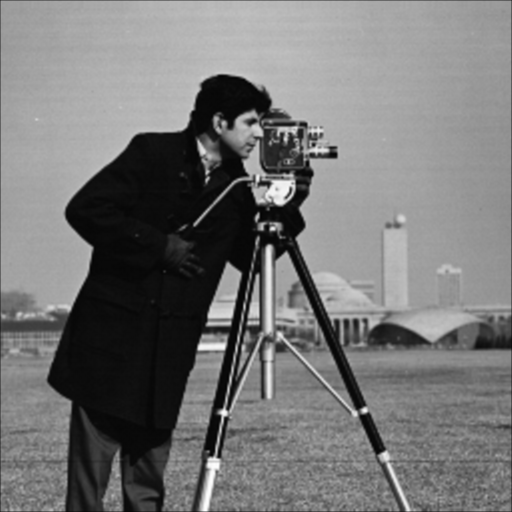

In [42]:
function doubleres(U)
    Ũ = Matrix{Float64}(undef, 2size(U,1)-1, size(U,2))
    Ũ[1:2:end,:] = U
    for k = 2:2:size(Ũ,1)-1
        Ũ[k,:] = (Ũ[k-1,:] + Ũ[k+1,:])/2
    end
    Ũ
end

Gray.(doubleres(doubleres(U)) * Diagonal(σ) * doubleres(doubleres(V))')

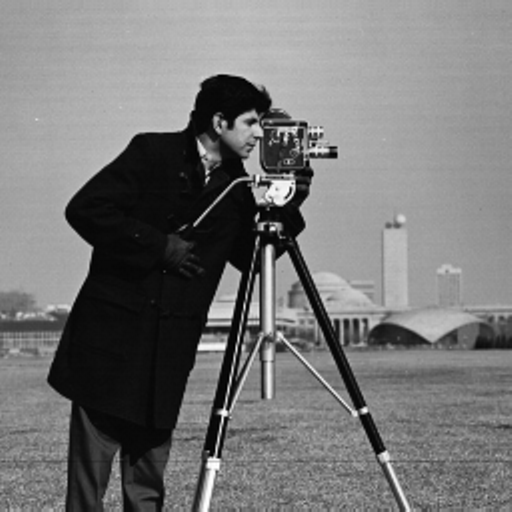

In [43]:
img

In [13]:
U[:,1]

512-element Vector{Float64}:
 -0.058477672644077994
 -0.05848071416852435
 -0.058567147200654944
 -0.05863448133224784
 -0.058442532555985645
 -0.05850120388905217
 -0.05839708783908404
 -0.05861817918917294
 -0.058393367003610544
 -0.05849580405755142
 -0.058414850700301266
 -0.05865923581314556
 -0.05846959958667877
  ⋮
 -0.03906750886524549
 -0.03894544092411148
 -0.038448647942339334
 -0.038312309011862694
 -0.03786992832984225
 -0.03797004894349339
 -0.03840332195297235
 -0.03920632625451464
 -0.03913977389052745
 -0.039230737835628894
 -0.03922994024479999
 -0.03922453069515049